In [50]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel
from pylab import scatter, show, title, xlabel, ylabel, plot, contour

In [51]:
def feature_normalize(X):
   
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = mean(X[:, i])
        s = std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s

    return X_norm, mean_r, std_r

In [52]:
def compute_cost(X, y, theta):
   
    m = y.size

    predictions = X.dot(theta)

    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)

    return J

In [53]:
def gradient_descent(X, y, theta, alpha, num_iters):
    
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta)

        ts = theta.size

        for fe in range(ts):

            temp = X[:, fe]
            temp.shape = (m, 1)

            errors_x1 = (predictions - y) * temp

            theta[fe][0] = theta[fe][0] - alpha * (1.0 / m) * errors_x1.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

In [54]:
def main(x2,y):
    m = y.size
    y.shape = (m, 1)

    fe = ones(shape=(m, f+1))
    x_num=0
    X2 = ones(shape=(m,f))
    for x_num in range (f):
   
        X2[:,x_num]=x2**(x_num+1)
        x_num=x_num+1
    
    X2, mean_r, std_r = feature_normalize(X2)
    fe[:, 1:f+1] = X2
   

    theta = zeros(shape=(f+1, 1))

    theta, J_history = gradient_descent(fe, y, theta, alpha, iterations)
    yhat=fe.dot(theta)
    i=0
    for i in range(m):
        if yhat[i] < 0:
            yhat[i] = 0
        i=i+1
    return theta, J_history, yhat


In [55]:
def calculate(x,y,yhat):
    m=y.size
    i=0
    re=te=0
    for i in range (m):
        re = re+abs(yhat[i-1]-y[i-1])/(y[i-1]+1)
        te = te+abs(x[i-1]-y[i-1])/(y[i-1]+1)
        
    relative_error = re/m
    t_error = te/m
    return relative_error, t_error

In [56]:
def pre_pdict(pdict,P1,P2,P3,thetaT):
    
    P1[5]=pdict
    x_num=0
    for x_num in range (f):
        P2[:,x_num]=P1**(x_num+1)
        x_num=x_num+1
    P2, mean_r, std_r = feature_normalize(P2)
    P3[:, 1:f+1] = P2
    test_yhat = P3.dot(thetaT)
    test=test_yhat[5]
    return test

In [57]:
def predict(pdict,model):
    if model == 1:
        P1=data[0:24,2]
        P2 = ones(shape=(m1,f))
        P3 = ones(shape=(m1, f+1))
        test = pre_pdict(pdict,P1,P2,P3,theta1)
    elif model == 2:
        P1=data[24:49,2]
        P2 = ones(shape=(m2,f))
        P3 = ones(shape=(m2, f+1))
        test = pre_pdict(pdict,P1,P2,P3,theta2)
    elif model == 3:
        P1=data[49:98,2]
        P2 = ones(shape=(m3,f))
        P3 = ones(shape=(m3, f+1))
        test = pre_pdict(pdict,P1,P2,P3,theta3)
    elif model == 4:
        P1=data[98:125,2]
        P2 = ones(shape=(m4,f))
        P3 = ones(shape=(m4, f+1))
        test = pre_pdict(pdict,P1,P2,P3,theta4)
    else:
        print'请选择正确的工地代码'
        test=233333
    return test

In [58]:
data = loadtxt('dpp4.txt', delimiter=',')
x1=data[:,1]#PLAYER
x2=data[:,2]#ORDER
x3=data[:,3]#DATA
y=data[:,0]


[[ 60.49775708]
 [ 42.90936765]
 [ 48.28856741]
 [ 33.41613856]
 [ 20.1739878 ]
 [ 11.36775217]
 [  5.97449596]
 [  2.76099337]
 [  0.86401901]
 [ -0.25266616]
 [ -0.90977421]
 [ -1.29664409]
 [ -1.52459603]
 [ -1.65902693]
 [ -1.73837209]
 [ -1.78524063]
 [ -1.81294524]
 [ -1.82933237]
 [ -1.83903089]
 [ -1.84477384]
 [ -1.8481761 ]
 [ -1.85019252]
 [ -1.85138804]
 [ -1.8520971 ]
 [ -1.85251776]
 [ -1.8527674 ]
 [ -1.85291557]
 [ -1.85300354]
 [ -1.85305578]
 [ -1.85308681]
 [ -1.85310524]
 [ -1.85311618]
 [ -1.85312269]
 [ -1.85312655]
 [ -1.85312885]
 [ -1.85313022]
 [ -1.85313103]
 [ -1.85313151]
 [ -1.8531318 ]
 [ -1.85313197]
 [ -1.85313207]
 [ -1.85313213]
 [ -1.85313217]
 [ -1.85313219]
 [ -1.8531322 ]
 [ -1.85313221]
 [ -1.85313221]
 [ -1.85313221]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]
 [ -1.85313222]]
[[ 4523.48737504]
 [ 4036.49599671]
 [ 3859.13745213]
 [ 3775.5440304 ]

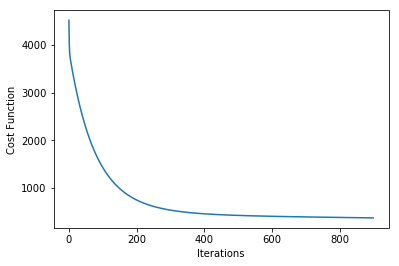

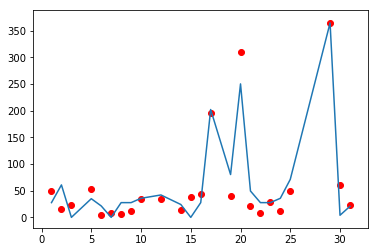

In [59]:
m1x=data[0:24,2]
m1y=data[0:24,0]
m1d=data[0:24,3]
f=57
iterations = 900
alpha = 0.008
theta1,J_history,yhat1=main(m1x,m1y)
print (theta1)
print(J_history)
m1 = m1x.size
m1x.shape = (m1, 1)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()
plot(m1d,yhat1)
scatter(m1d, m1y, marker='o', c='r')
show()

[[ 58.27770174]
 [ 48.46406251]
 [ 26.13003342]
 [ 12.049318  ]
 [  5.28033404]
 [  2.08884514]
 [  0.55142419]
 [ -0.20549306]
 [ -0.58446395]
 [ -0.77660474]
 [ -0.87496131]
 [ -0.92569391]
 [ -0.95202463]
 [ -0.96576122]
 [ -0.97295869]
 [ -0.97674375]
 [ -0.97874043]
 [ -0.97979645]
 [ -0.98035619]
 [ -0.98065342]
 [ -0.98081149]
 [ -0.98089566]
 [ -0.98094052]
 [ -0.98096446]
 [ -0.98097723]
 [ -0.98098406]
 [ -0.9809877 ]
 [ -0.98098965]
 [ -0.9809907 ]
 [ -0.98099125]
 [ -0.98099155]
 [ -0.98099171]
 [ -0.9809918 ]
 [ -0.98099184]
 [ -0.98099187]
 [ -0.98099188]
 [ -0.98099189]
 [ -0.98099189]
 [ -0.98099189]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]
 [ -0.9809919 ]]
[[ 2862.06785678]
 [ 2710.88871991]
 [ 2641.56008472]
 [ 2597.20107176]

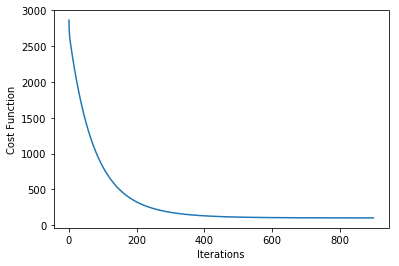

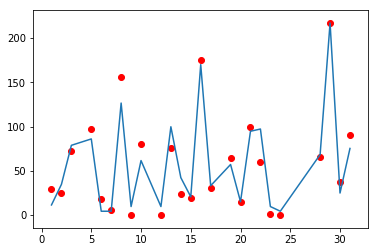

In [60]:
m2x=data[24:49,2]
m2y=data[24:49,0]
m2d=data[24:49,3]
f=57
iterations = 900
alpha = 0.008
theta2,J_history,yhat2=main(m2x,m2y)
print (theta2)
print(J_history)
m2 = m2x.size
m2x.shape = (m2, 1)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()
plot(m2d,yhat2)
scatter(m2d, m2y, marker='o', c='r')
show()

[[  2.56237126e+02]
 [  7.61233485e+01]
 [  4.91443576e+01]
 [  3.18021664e+01]
 [  2.06046835e+01]
 [  1.32900006e+01]
 [  8.45963855e+00]
 [  5.22589480e+00]
 [  3.03061040e+00]
 [  1.52266305e+00]
 [  4.77678093e-01]
 [ -2.50935805e-01]
 [ -7.61025050e-01]
 [ -1.11904980e+00]
 [ -1.37073791e+00]
 [ -1.54783522e+00]
 [ -1.67251173e+00]
 [ -1.76030824e+00]
 [ -1.82214337e+00]
 [ -1.86569821e+00]
 [ -1.89637989e+00]
 [ -1.91799584e+00]
 [ -1.93322730e+00]
 [ -1.94396232e+00]
 [ -1.95153037e+00]
 [ -1.95686752e+00]
 [ -1.96063284e+00]
 [ -1.96329041e+00]
 [ -1.96516705e+00]
 [ -1.96649293e+00]
 [ -1.96743022e+00]
 [ -1.96809321e+00]
 [ -1.96856247e+00]
 [ -1.96889482e+00]
 [ -1.96913037e+00]
 [ -1.96929743e+00]
 [ -1.96941599e+00]
 [ -1.96950020e+00]
 [ -1.96956005e+00]
 [ -1.96960262e+00]
 [ -1.96963292e+00]
 [ -1.96965451e+00]
 [ -1.96966989e+00]
 [ -1.96968087e+00]
 [ -1.96968870e+00]
 [ -1.96969430e+00]
 [ -1.96969830e+00]
 [ -1.96970116e+00]
 [ -1.96970321e+00]
 [ -1.96970467e+00]


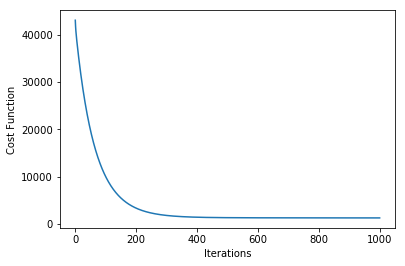

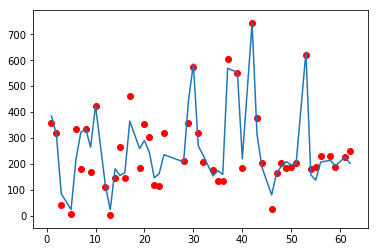

In [61]:
m3x=data[49:98,2]
m3y=data[49:98,0]
m3d=data[49:98,3]
f=57
iterations = 1000
alpha = 0.007
theta3,J_history,yhat3=main(m3x,m3y)
print (theta3)
print(J_history)
m3 = m3x.size
m3x.shape = (m3, 1)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()
plot(m3d,yhat3)
scatter(m3d, m3y, marker='o', c='r')
show()

[[  1.05108897e+02]
 [  4.04375104e+01]
 [  2.69155617e+01]
 [  1.47621788e+01]
 [  5.95841285e+00]
 [  3.36993330e-01]
 [ -2.89127525e+00]
 [ -4.52141394e+00]
 [ -5.16049627e+00]
 [ -5.21870132e+00]
 [ -4.95567098e+00]
 [ -4.52944009e+00]
 [ -4.03352953e+00]
 [ -3.52181269e+00]
 [ -3.02424752e+00]
 [ -2.55654186e+00]
 [ -2.12600421e+00]
 [ -1.73506017e+00]
 [ -1.38335898e+00]
 [ -1.06903321e+00]
 [ -7.89449674e-01]
 [ -5.41654481e-01]
 [ -3.22633332e-01]
 [ -1.29459970e-01]
 [  4.06232254e-02]
 [  1.90165794e-01]
 [  3.21494552e-01]
 [  4.36713677e-01]
 [  5.37713307e-01]
 [  6.26182771e-01]
 [  7.03626060e-01]
 [  7.71378067e-01]
 [  8.30620669e-01]
 [  8.82398168e-01]
 [  9.27631744e-01]
 [  9.67132831e-01]
 [  1.00161532e+00]
 [  1.03170661e+00]
 [  1.05795763e+00]
 [  1.08085169e+00]
 [  1.10081255e+00]
 [  1.11821146e+00]
 [  1.13337351e+00]
 [  1.14658319e+00]
 [  1.15808936e+00]
 [  1.16810960e+00]
 [  1.17683406e+00]
 [  1.18442886e+00]
 [  1.19103908e+00]
 [  1.19679135e+00]


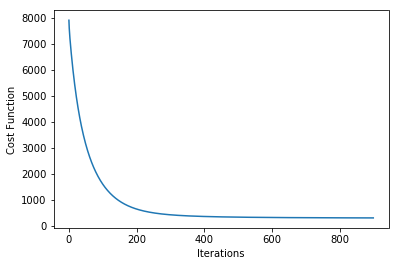

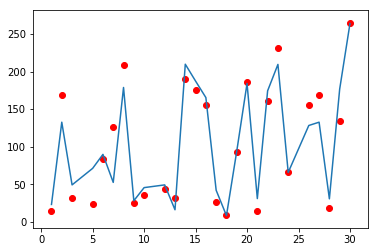

In [62]:
m4x=data[98:125,2]
m4y=data[98:125,0]
m4d=data[98:125,3]
f=57
iterations = 900
alpha = 0.008
theta4,J_history,yhat4=main(m4x,m4y)
print (theta4)
print(J_history)
m4 = m4x.size
m4x.shape = (m4, 1)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()
plot(m4d,yhat4)
scatter(m4d, m4y, marker='o', c='r')
show()

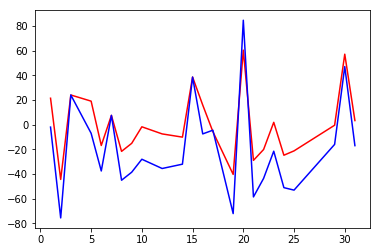

In [63]:
plot(m1d,m1y-yhat1,c='r')
plot(m1d,m1y-m1x,c='b')

show()

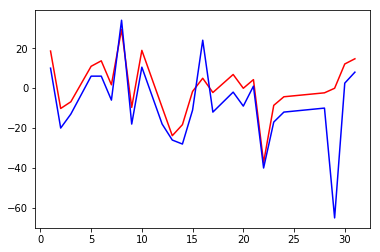

In [64]:
plot(m2d,m2y-yhat2,c='r')
plot(m2d,m2y-m2x,c='b')
show()

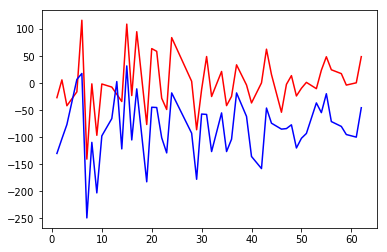

In [65]:
plot(m3d,m3y-yhat3,c='r')
plot(m3d,m3y-m3x,c='b')
show()

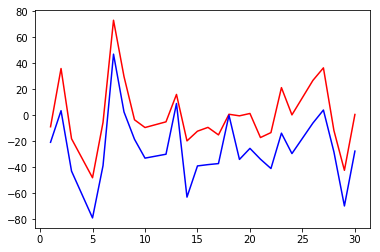

In [66]:
plot(m4d,m4y-yhat4,c='r')
plot(m4d,m4y-m4x,c='b')
show()

In [67]:
calculate(m1x,m1y,yhat1)

(array([ 0.9668483]), array([ 1.86932643]))

In [68]:
calculate(m2x,m2y,yhat2)

(array([ 1.31912017]), array([ 2.54974726]))

In [69]:
calculate(m3x,m3y,yhat3)

(array([ 0.34829815]), array([ 0.52733317]))

In [70]:
calculate(m4x,m4y,yhat4)

(array([ 0.32014125]), array([ 0.63729702]))

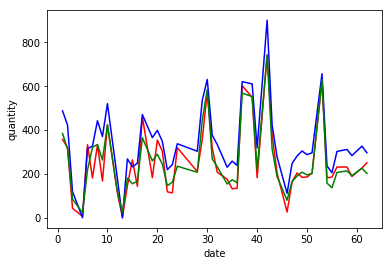

In [77]:
plot(m3d,m3y,c='r')
plot(m3d,m3x,c='b')
plot(m3d,yhat3,c='g')
xlabel('date')
ylabel('quantity')
show()#红色是实际量，蓝色是前一天预订量，绿色是系统预测量

In [72]:
predict(143,3)#预测函数，predict(预定量，选择模型1，2，3，4)，其中1:田湾厂-J3613,2:田湾厂-J3623，3:青衣厂-3568,4:青衣厂-3518

array([ 104.35357458])

In [73]:
data_test=loadtxt('dpppp5.txt',delimiter=',')
xt=data_test[:,2]
yt=data_test[:,0]
m_t=yt.size
i=0
e_t = ones(shape=(m_t,1))
t_t = ones(shape=(m_t,1))
yhat_t = ones(shape=(m_t,1))
for i in range(m_t):
    x_t1 = xt[i]
    e_t[i] = abs(yt[i]-predict(x_t1,1))
    t_t[i]=abs(yt[i]-xt[i])
    yhat_t[i]=predict(x_t1,3)
print(calculate(xt,yt,yhat_t))

(array([ 0.12705052]), 0.45387547321078953)


In [74]:
calculate(xt,yt,yhat_t)

(array([ 0.12705052]), 0.45387547321078953)

In [75]:
predict(327,3)

array([ 228.42946232])